In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd
import os 


In [ ]:
for dirname, _, filenames in os.walk('./drive/MyDrive/DeepLearning/CNN/Codes/Data/African_dress'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./drive/MyDrive/DeepLearning/CNN/Codes/Data/African_dress/0010.jpg
./drive/MyDrive/DeepLearning/CNN/Codes/Data/African_dress/0008.jpg
./drive/MyDrive/DeepLearning/CNN/Codes/Data/African_dress/0009.jpg
./drive/MyDrive/DeepLearning/CNN/Codes/Data/African_dress/0007.jpg
./drive/MyDrive/DeepLearning/CNN/Codes/Data/African_dress/0003.jpg
./drive/MyDrive/DeepLearning/CNN/Codes/Data/African_dress/0002.jpg
./drive/MyDrive/DeepLearning/CNN/Codes/Data/African_dress/0004.jpg
./drive/MyDrive/DeepLearning/CNN/Codes/Data/African_dress/0006.jpg
./drive/MyDrive/DeepLearning/CNN/Codes/Data/African_dress/0005.jpg
./drive/MyDrive/DeepLearning/CNN/Codes/Data/African_dress/0017.jpg
./drive/MyDrive/DeepLearning/CNN/Codes/Data/African_dress/0015.jpg
./drive/MyDrive/DeepLearning/CNN/Codes/Data/African_dress/0012.jpg
./drive/MyDrive/DeepLearning/CNN/Codes/Data/African_dress/0016.jpg
./drive/MyDrive/DeepLearning/CNN/Codes/Data/African_dress/0014.jpg
./drive/MyDrive/DeepLearning/CNN/Codes/Data/African_dress/0013

In [ ]:
len(filenames)

1059

In [ ]:
from PIL import Image
from numpy import asarray
import numpy as np
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.optimizers import Adam
from keras.models import Sequential
from matplotlib import pyplot
from keras.layers import BatchNormalization
from keras.initializers import RandomNormal
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import (Input, MaxPooling2D, GlobalAveragePooling2D, 
                          UpSampling2D,Conv2DTranspose,LeakyReLU,Dropout,
                          Activation,Dense,Flatten,Reshape,Conv2D)

In [ ]:
dataset_orig = np.empty((len(filenames), 64, 64,3))

In [ ]:
ind=0
for i in filenames:
    image = Image.open(os.path.join(dirname, i))
    data = asarray(image)
    dataset_orig[ind]=data
    ind+=1

In [ ]:
width, height, channel = 64, 64, 3
np.random.shuffle(dataset_orig)
X=dataset_orig

In [ ]:
X = (X - 127.5) / 127.5

In [ ]:
X.shape

(1059, 64, 64, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

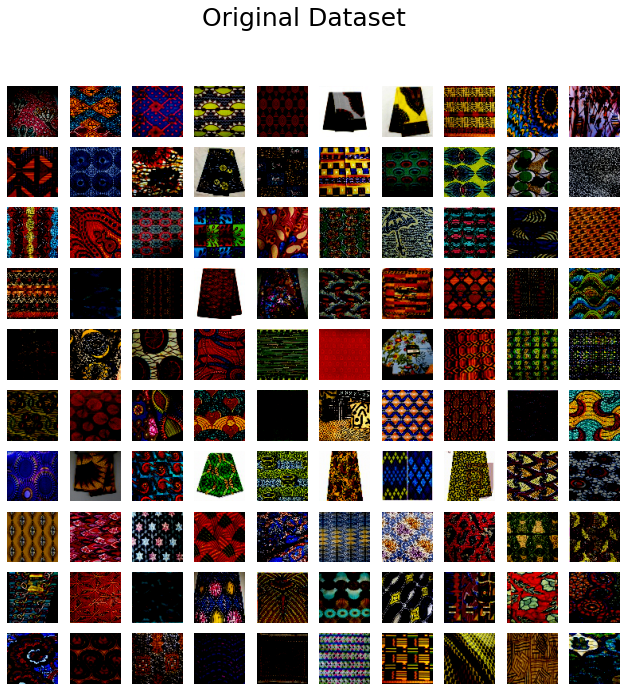

In [ ]:
import matplotlib.pyplot as plt
def show_data(X, title=""):
    plt.figure(figsize=(11,11))
    
    i = 1
    for img in X:
        plt.subplot(10, 10, i)
        plt.imshow(img.reshape((height, width,channel)))
        plt.axis('off')
        i+=1
        if i>100: break

    plt.suptitle(title, fontsize = 25)
    plt.show()
    
show_data(X, title="Original Dataset")

In [ ]:
gen_optimizer = Adam(0.0001, 0.5)
disc_optimizer = Adam(0.0002, 0.5)
noise_dim = 100

In [ ]:
def buildGenerator():
    model = Sequential()

    model.add(Dense(1024, input_dim=noise_dim))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    
    model.add(Dense(8192, input_dim=noise_dim))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    
    model.add(Reshape((8, 8, 128)))
    
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(64, (2, 2), padding='same', 
                     kernel_initializer=RandomNormal(0, 0.02)))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(0.2))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(64, (2, 2), padding='same', 
                     kernel_initializer=RandomNormal(0, 0.02)))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(0.2))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(channel, (3, 3), padding='same', activation = "tanh", 
                     kernel_initializer=RandomNormal(0, 0.02)))
    
    return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              103424    
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8192)              8396800   
_________________________________________________________________
batch_normalization_1 (Batch (None, 8192)              32768     
_________________________________________________________________
activation_1 (Activation)    (None, 8192)              0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 128)         0

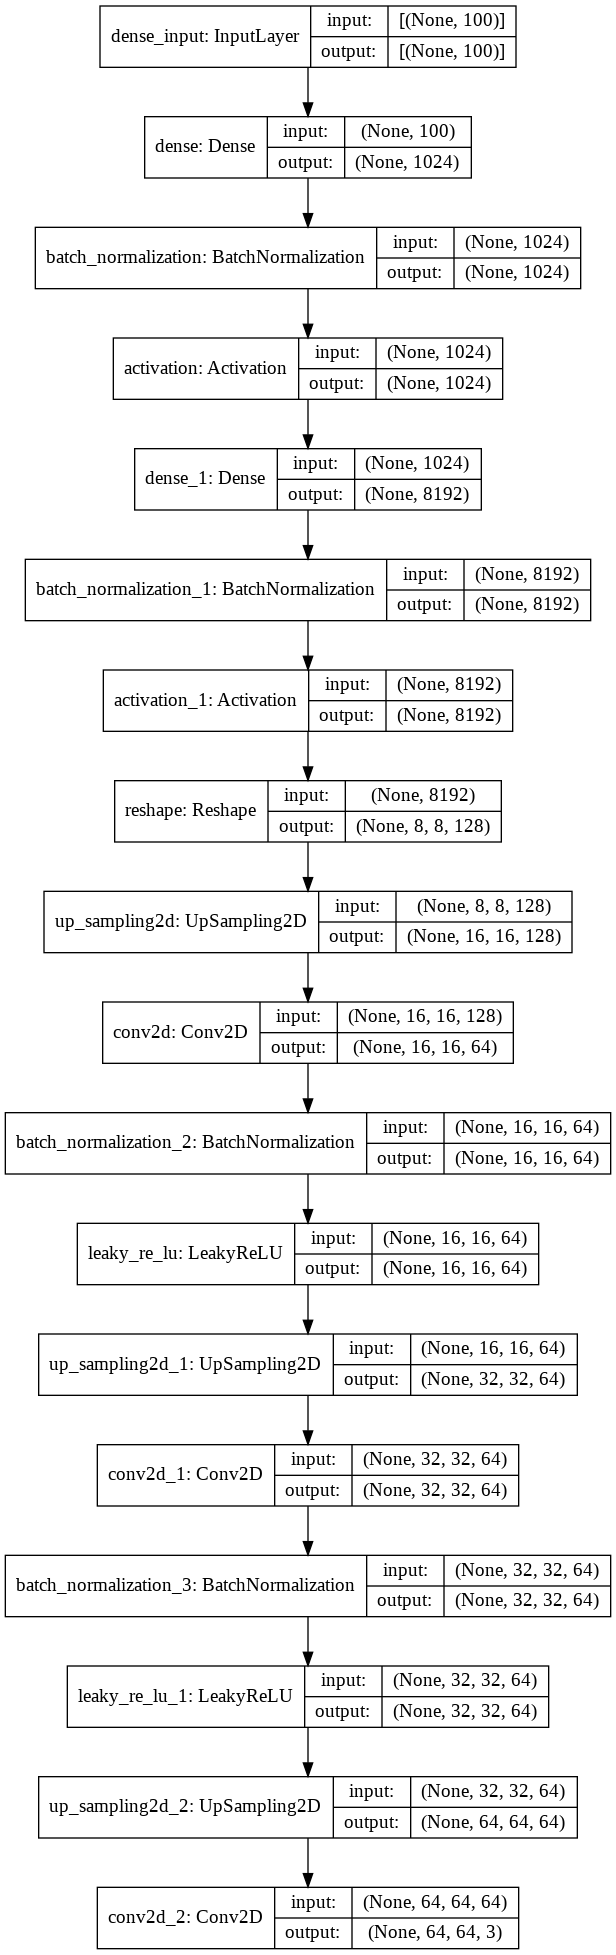

In [ ]:
generator = buildGenerator()
generator.summary()
# plot the model
plot_model(generator, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def buildDiscriminator():
    model = Sequential()
    
    model.add(Conv2D(64, (5, 5), strides=2, padding='same', 
                     kernel_initializer=RandomNormal(0, 0.02), 
                     input_shape=(width, height, channel)))
    model.add(LeakyReLU(0.2))


    model.add(Conv2D(64, (5, 5), strides=2, padding='same', 
                     kernel_initializer=RandomNormal(0, 0.02), 
                     input_shape=(width, height, channel)))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(128, (5, 5), strides=2,padding='same', 
                     kernel_initializer=RandomNormal(0, 0.02)))
    model.add(LeakyReLU(0.2))
    
    model.add(Flatten())
    
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    
    model.add(Dropout(0.5))

    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=disc_optimizer)
    return model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        102464    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)             

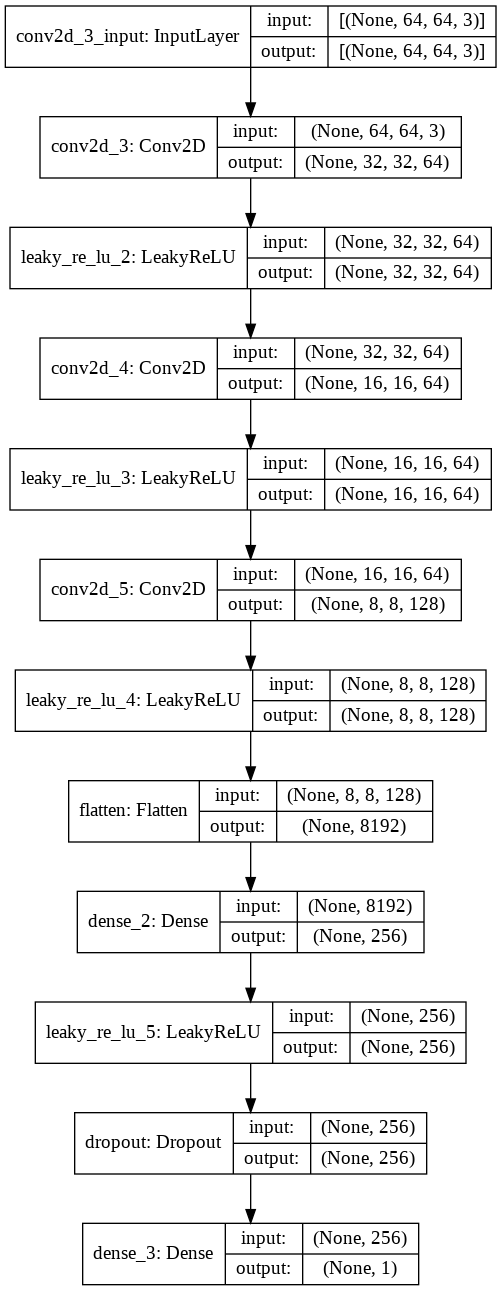

In [ ]:
discriminator = buildDiscriminator()
discriminator.summary()
# plot the model
plot_model(discriminator, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
noise = Input(shape=(noise_dim,))
fake_data = generator(noise)
discriminator.trainable = False
output = discriminator(fake_data)
gan = Model(noise, output)
gan.compile(loss='binary_crossentropy', optimizer=gen_optimizer)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 64, 64, 3)         8588611   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 2409921   
Total params: 10,998,532
Trainable params: 8,569,923
Non-trainable params: 2,428,609
_________________________________________________________________


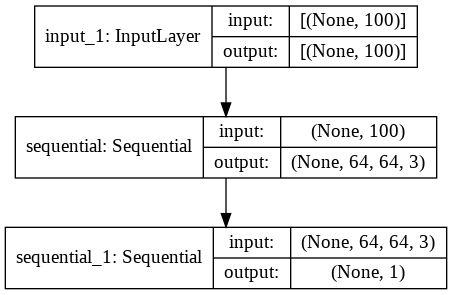

In [ ]:
gan.summary()
# plot the model
plot_model(gan, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
fixed_noise = np.random.normal(0, 1, size=(100, noise_dim))

In [ ]:
def show_generated_fabric(title, epoch):
    imgs = generator.predict(fixed_noise)
    imgs = 0.5 * imgs + 0.5
    plt.figure(figsize=(11,11))
    
    i = 1
    for img in imgs:
        plt.subplot(10, 10, i)
        plt.imshow(img.reshape((height,width,channel)))
        plt.axis('off')
        i+=1
    plt.suptitle(title, fontsize = 25)
    plt.savefig(str(epoch+1)+".png", transparent=True)
    plt.show()

In [ ]:
epochs = 500
batch_size = 128
steps_per_epoch = len(X)//batch_size

epoch:  0
discriminator loss:  0.5241752862930298
generator loss:  0.30136239528656006
--------------------------------------------------------------------------------
epoch:  1
discriminator loss:  0.6004772782325745
generator loss:  0.3632293939590454
--------------------------------------------------------------------------------
epoch:  2
discriminator loss:  0.6632925271987915
generator loss:  0.6208045482635498
--------------------------------------------------------------------------------
epoch:  3
discriminator loss:  0.3894727826118469
generator loss:  0.9937330484390259
--------------------------------------------------------------------------------
epoch:  4
discriminator loss:  0.4593963921070099
generator loss:  0.6357234716415405
--------------------------------------------------------------------------------
epoch:  5
discriminator loss:  0.5677390098571777
generator loss:  1.144956350326538
-------------------------------------------------------------------------------

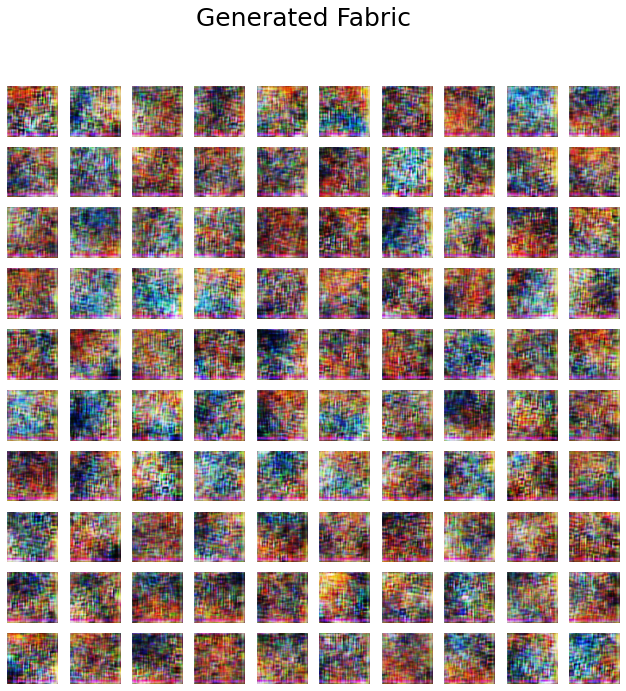

epoch:  20
discriminator loss:  0.45887309312820435
generator loss:  0.9609454274177551
--------------------------------------------------------------------------------
epoch:  21
discriminator loss:  0.5686327219009399
generator loss:  1.5855631828308105
--------------------------------------------------------------------------------
epoch:  22
discriminator loss:  0.41667723655700684
generator loss:  1.2963833808898926
--------------------------------------------------------------------------------
epoch:  23
discriminator loss:  0.5453588962554932
generator loss:  0.9887906312942505
--------------------------------------------------------------------------------
epoch:  24
discriminator loss:  0.4146154224872589
generator loss:  1.3190267086029053
--------------------------------------------------------------------------------
epoch:  25
discriminator loss:  0.4404652416706085
generator loss:  1.3699657917022705
-----------------------------------------------------------------------

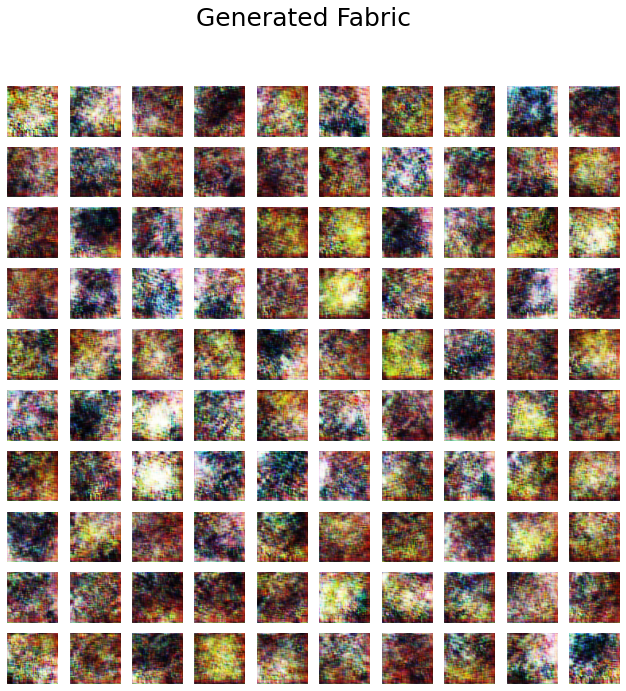

epoch:  40
discriminator loss:  0.4785853326320648
generator loss:  1.2333632707595825
--------------------------------------------------------------------------------
epoch:  41
discriminator loss:  0.465248167514801
generator loss:  1.4439752101898193
--------------------------------------------------------------------------------
epoch:  42
discriminator loss:  0.42306917905807495
generator loss:  1.103100061416626
--------------------------------------------------------------------------------
epoch:  43
discriminator loss:  0.46805042028427124
generator loss:  1.7801722288131714
--------------------------------------------------------------------------------
epoch:  44
discriminator loss:  0.41548043489456177
generator loss:  1.415930986404419
--------------------------------------------------------------------------------
epoch:  45
discriminator loss:  0.4423101544380188
generator loss:  1.5548996925354004
-------------------------------------------------------------------------

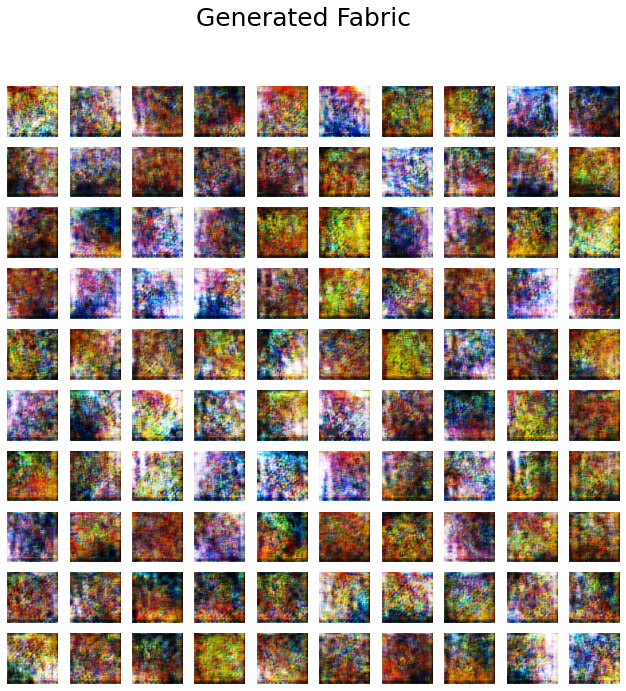

epoch:  60
discriminator loss:  0.42427337169647217
generator loss:  1.1775131225585938
--------------------------------------------------------------------------------
epoch:  61
discriminator loss:  0.4097689688205719
generator loss:  1.6165119409561157
--------------------------------------------------------------------------------
epoch:  62
discriminator loss:  0.4983978867530823
generator loss:  0.6711585521697998
--------------------------------------------------------------------------------
epoch:  63
discriminator loss:  0.4372738003730774
generator loss:  1.420518398284912
--------------------------------------------------------------------------------
epoch:  64
discriminator loss:  0.422188937664032
generator loss:  1.478182315826416
--------------------------------------------------------------------------------
epoch:  65
discriminator loss:  0.4091424345970154
generator loss:  2.1203746795654297
---------------------------------------------------------------------------

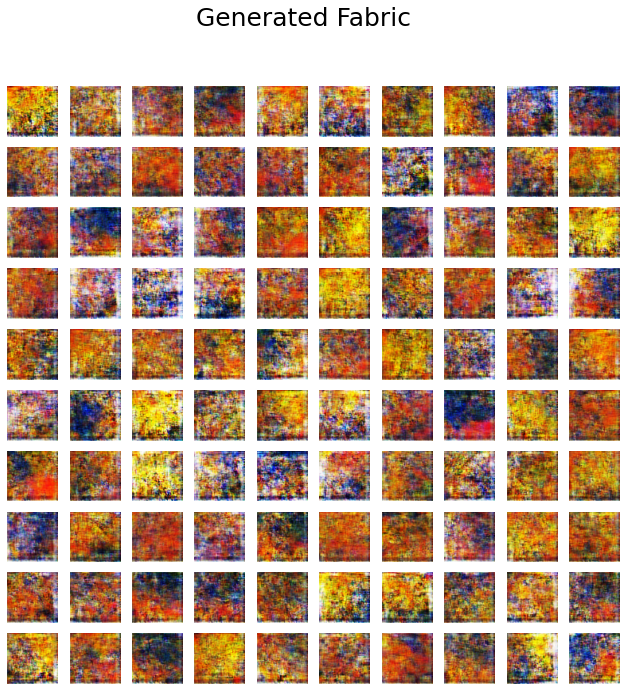

epoch:  80
discriminator loss:  0.40902289748191833
generator loss:  1.7116307020187378
--------------------------------------------------------------------------------
epoch:  81
discriminator loss:  0.7852392196655273
generator loss:  1.151636004447937
--------------------------------------------------------------------------------
epoch:  82
discriminator loss:  0.41532522439956665
generator loss:  1.472663402557373
--------------------------------------------------------------------------------
epoch:  83
discriminator loss:  0.4910796880722046
generator loss:  0.8712620735168457
--------------------------------------------------------------------------------
epoch:  84
discriminator loss:  0.4397696852684021
generator loss:  1.3838244676589966
--------------------------------------------------------------------------------
epoch:  85
discriminator loss:  0.4962647557258606
generator loss:  2.184663772583008
--------------------------------------------------------------------------

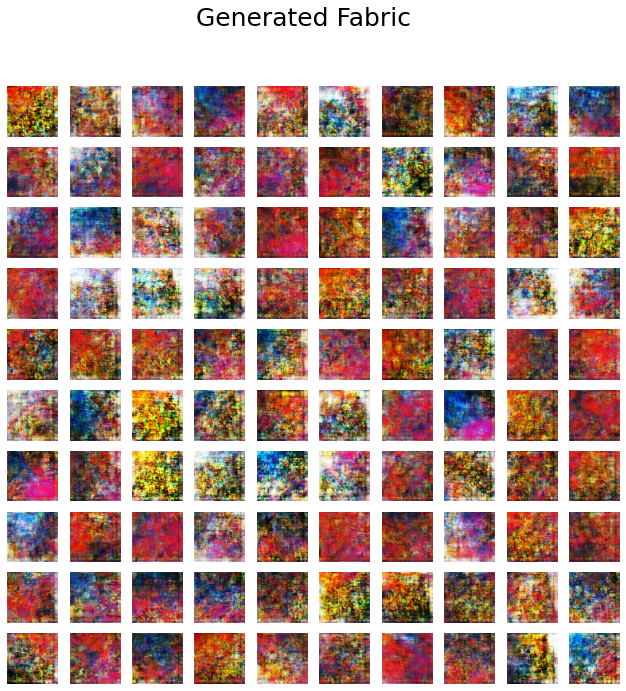

In [ ]:
for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        input_gen = np.random.normal(0, 1, size=(batch_size, noise_dim))
        fake_data = generator.predict(input_gen)
        
        real_data = X[np.random.randint(0, X.shape[0], size=batch_size)]
        real_data = real_data.reshape((batch_size, width, height, channel))
        
        input_disc = np.concatenate((real_data, fake_data))

        label_disc = np.zeros(2*batch_size)
        label_disc[:batch_size] = 0.9
        label_disc[batch_size:] = 0.1
        loss_disc = discriminator.train_on_batch(input_disc, label_disc)

        label_gen = np.ones(batch_size)
        loss_gen = gan.train_on_batch(input_gen, label_gen)

    print("epoch: ", epoch)
    print("discriminator loss: ", loss_disc)
    print("generator loss: ", loss_gen)
    print("-"*80)
    
    if (epoch+1) % 20 == 0:
        show_generated_fabric("Generated Fabric", epoch)
        filename = 'generator_model_%03d.h5' % (epoch+1)
        generator.save(filename)

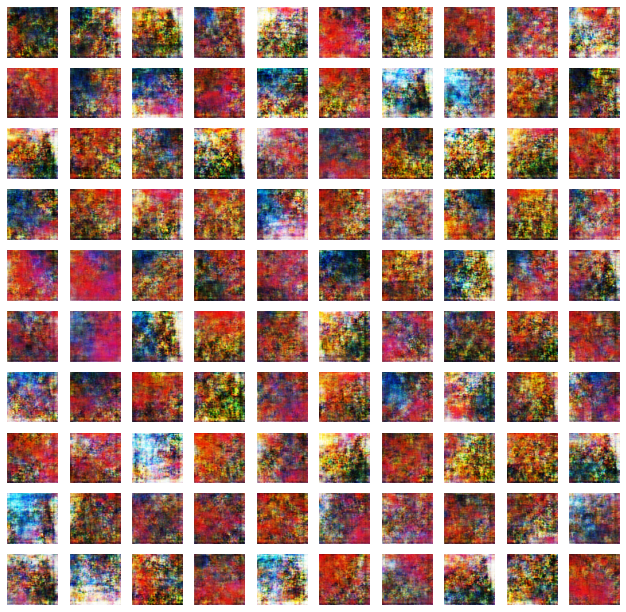